# BIA 656 Final Project

### Project Brief

In [1]:
# Essential DS libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Computation time
import time

%matplotlib inline

In [32]:
raw_data = pd.read_csv('rentals.csv')

# Exploratory Data Analysis

In [30]:
raw_data.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65.0
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65.0


In [4]:
raw_data.shape

(8111, 9)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


It appears that *price* is stored as an *object* type, typically meaning a String. We will have to convert it to a float before moving onto the remainder of our analysis. We will first remove any non-numeric characters (e.g. dollar signs) from this column using regex and then divide the total by 100 to keep the values in line with the originals.

In [33]:
# Removing any non-digits using regex then converting to float and dividing by 100
raw_data['price'] = raw_data['price'].str.replace(r'[^0-9]+','', regex=True)
raw_data['price'] = raw_data['price'].astype(float)
raw_data['price'] = raw_data['price']/100

In [7]:
raw_data.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03,8111.000000
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04,225.407101
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06,412.253039
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00,100.000000
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00,150.000000
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01,240.000000
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


It looks like the maximum value of the feature *minimum_nights* is 100,000,000 - clearly a typo or corrupted data. We will plot histograms of all features next and then zoom into this feature to identify any other potential instances for removal.

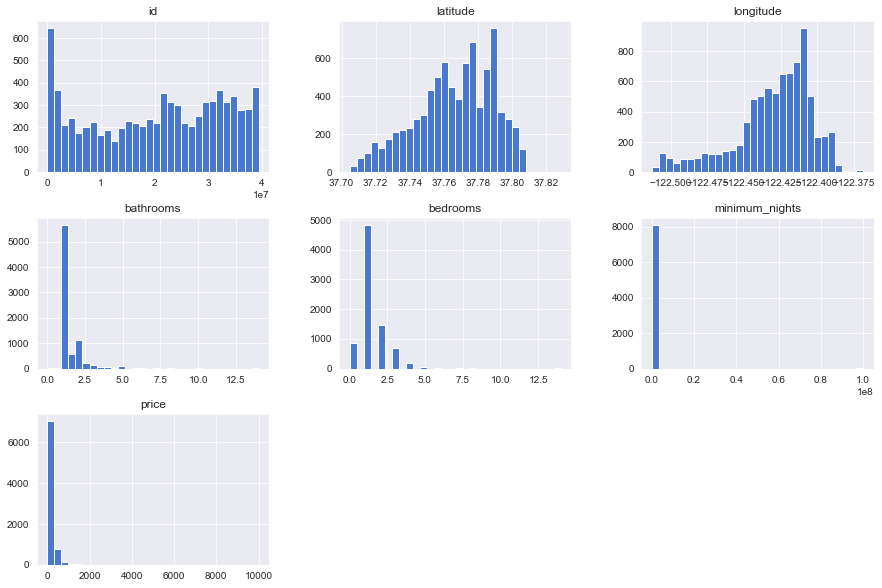

In [8]:
sns.set_style('darkgrid')
sns.set_palette('muted')
_ = raw_data.hist(bins=30, figsize=(15,10))

The distributions of the other numerical features do not show any abnormalities. So now let us try to approximate the number of data entry errors in the *minimum_nights* feature. Let's start with a value of 50.

In [9]:
len(raw_data[raw_data['minimum_nights'] > 50])

129

In [10]:
len(raw_data[raw_data['minimum_nights'] > 180])

20

As a further investigative measure, we'll quickly analyze the price distribution of properties with a minimum stay of 50 nights.

In [18]:
outlier_prices = raw_data.loc[raw_data['minimum_nights'] > 50, 'price']

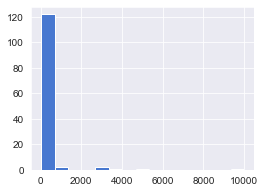

In [19]:
_ = outlier_prices.hist(bins=15, figsize=(4,3))

In [20]:
outlier_prices.describe()

count     129.000000
mean      386.697674
std      1076.715286
min        29.000000
25%       115.000000
50%       170.000000
75%       248.000000
max      9999.000000
Name: price, dtype: float64

Since it is feasible that some properties might require a longer-term vacation rental, as since the price distribution does not seem abnormal, we will now check whether the 100,000,000 required nights stay property is also the one with the $10,000/night price outlier.

In [35]:
outliers = raw_data.nlargest(50, 'minimum_nights')

In [36]:
outliers.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,1.324902e+07,37.772764,-122.419108,1.640000,1.640000,203.04000,488.180000
std,1.265904e+07,0.021592,0.025426,0.714571,0.875051,97.31853,1468.846524
min,1.713200e+04,37.711780,-122.505890,1.000000,0.000000,90.00000,29.000000
25%,1.244728e+06,37.759608,-122.435092,1.000000,1.000000,125.00000,131.250000
50%,8.580468e+06,37.777020,-122.416940,1.500000,1.500000,180.00000,200.000000
75%,2.259717e+07,37.786785,-122.399250,2.000000,2.000000,197.00000,284.500000
max,3.794068e+07,37.805340,-122.370940,3.000000,3.000000,365.00000,9999.000000


In [49]:
large_min_nights = raw_data[raw_data['minimum_nights'] > 30].sort_values(by='minimum_nights')
large_min_nights.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
1676,6798145,37.72962,-122.37163,Townhouse,Entire home/apt,1.5,2.0,31,110.0
2334,11048190,37.75161,-122.42143,Apartment,Entire home/apt,1.0,1.0,31,165.0
2335,11048759,37.75503,-122.40184,Guest suite,Entire home/apt,1.0,0.0,31,155.0
5866,30353855,37.76877,-122.44887,House,Shared room,3.5,1.0,31,33.0
5862,30346313,37.76782,-122.44890,House,Shared room,3.5,1.0,31,33.0


In [50]:
len(large_min_nights)/len(raw_data)

0.03823384311790824

In [51]:
len(raw_data[raw_data['bedrooms'] == 0])

854

While they did not exactly match, these groups overlap. Given the data above, we can remove outliers/typos in both *minimum_nights* and *price* columns by deleting any rows with *minimum_nights* greater than 30 days. We are working under the assumption that this platform is geared toward short-term rentals, hence we can likely safely remove these data points.  

Additionally, we will remove listings with *bedrooms* equal to zero 0, as these are likely data entry errors that can severely skew our predictions.

In [52]:
# Dropping minimum nights outliers/typos rows
raw_data = raw_data.loc[raw_data['minimum_nights'] <= 90]
raw_data = raw_data.loc[raw_data['minimum_nights'] > 0]
raw_data = raw_data.loc[raw_data['bedrooms'] > 0]

We'll also investigate price outliers and remove them from our dataset for prediction.

In [53]:
len(raw_data[raw_data['price'] > 1000])

106

In [54]:
len(raw_data[raw_data['price'] < 20])

7

In [55]:
# Dropping price outliers/typos rows
raw_data = raw_data.loc[raw_data['price'] <= 250]
raw_data = raw_data.loc[raw_data['price'] >= 20]

In [56]:
raw_data.shape

(5520, 9)

Lastly, we'll analyze the value counts for both categorical variables, *property_type* and *room_type*.

In [57]:
raw_data['property_type'].value_counts()

Apartment             2224
House                 1682
Condominium            549
Guest suite            437
Boutique hotel         142
Townhouse               99
Hostel                  81
Hotel                   58
Loft                    52
Serviced apartment      46
Aparthotel              35
Bed and breakfast       35
Guesthouse              23
Other                   15
Bungalow                12
Cottage                  9
Villa                    7
Castle                   4
Tiny house               3
Cabin                    3
Resort                   1
Earth house              1
Hut                      1
Dome house               1
Name: property_type, dtype: int64

In [58]:
raw_data['room_type'].value_counts()

Entire home/apt    2615
Private room       2533
Shared room         233
Hotel room          139
Name: room_type, dtype: int64

To make analysis and computation less complex later on, we'll cut down on the number of values of the categorical variable *property_type* - we'll make the choice to classify all values below "Other" as "Other." This will ensure we capture most of the variance in this variable while limiting the number of columns after we encode it before modeling.

In [60]:
misc_vals = ['Bungalow', 'Resort', 'Cottage', 'Villa', 'Castle', 'Cabin', \
            'Tiny house', 'Earth house', 'Hut', 'Dome house', 'Hut']

In [61]:
# Substituting misc. values w/ "other"
raw_data.loc[raw_data['property_type'].isin(misc_vals), 'property_type'] = 'Other'

In [62]:
raw_data['property_type'].value_counts()

Apartment             2224
House                 1682
Condominium            549
Guest suite            437
Boutique hotel         142
Townhouse               99
Hostel                  81
Hotel                   58
Other                   57
Loft                    52
Serviced apartment      46
Bed and breakfast       35
Aparthotel              35
Guesthouse              23
Name: property_type, dtype: int64

At this point, we will separate train and test groups in order to prevent any data snooping bias.

In [63]:
# Relevant function
from sklearn.model_selection import train_test_split

In [95]:
# Splitting data into 80/20 train and test groups
train_set, test_set = train_test_split(raw_data, test_size = 0.2, random_state=26)

Our last EDA steps (which we will perform on just the training data) will be to look for any correlations as well as plot all numerical variables against one another.

In [66]:
corr_matrix = train_set.corr()
corr_matrix['price'].sort_values(ascending=False)

price             1.000000
bedrooms          0.390402
latitude          0.161601
longitude         0.110995
id                0.012372
minimum_nights   -0.043892
bathrooms        -0.158960
Name: price, dtype: float64

In [67]:
from pandas.plotting import scatter_matrix

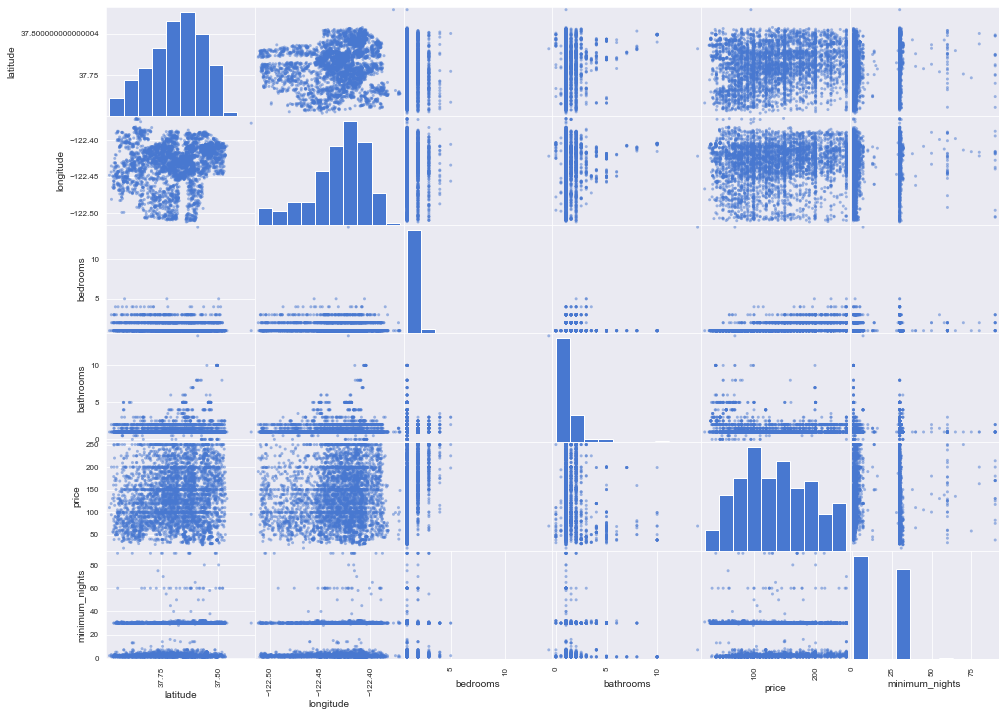

In [68]:
columns = ['latitude', 'longitude', 'bedrooms', 'bathrooms', 'price', 'minimum_nights']
_ = scatter_matrix(train_set[columns], figsize = (16, 12))

The charts above do not indicate any particularly interesting trends or abnormalities - hence, we will now move onto the data preparation stage.

# Data Preparation

Our first step in this stage will be feature engineering - we will create neighborhood clusters using latitude and longitude in order to assign them a neighborhood label. Our hope is that this will improve the predictive power of our model.  

In order to select the best K number of clusters, we'll calculate silhouette scores and plot silhouette diagrams.

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = train_set[['latitude', 'longitude']].copy().values
cluster_range = [3,4,5,6,7,8]

In [73]:
# Adapted from sklearn documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def bestKMeansSilScore(X, cluster_range):
	"""Compute silhouette scores and plots silhouette diagrams given data X and range of clusters cluster_range."""
		
	for n_clusters in cluster_range:

		# Setting up plots
		fig, ax = plt.subplots()
		fig.set_size_inches(12,9)
		ax.set_xlim([-0.2, 1])
		ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

		# Create a clusterer with n_cluster value and obtain labels
		clusterer = KMeans(n_clusters=n_clusters, random_state=42)
		cluster_labels = clusterer.fit_predict(X)

		# Compute avg. silhouette score
		sil_avg = silhouette_score(X, cluster_labels)
		print(f'For {n_clusters} clusters, we obtain an average silhouette score of {sil_avg}.')

		# Compute silhouette scores for each sample
		sil_values = silhouette_samples(X, cluster_labels)

		y_lower = 10

		for i in range(n_clusters):
			# Aggregate the silhouette scores for samples belonging to
			# cluster i, and sort them
			ith_cluster_sil_values = sil_values[cluster_labels == i]

			ith_cluster_sil_values.sort()

			size_cluster_i = ith_cluster_sil_values.shape[0]
			y_upper = y_lower + size_cluster_i

			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(
				np.arange(y_lower, y_upper),0,ith_cluster_sil_values, \
				 facecolor=color, edgecolor=color,alpha=0.5,
			)

			# Labeling sil. plots with cluster numbers in the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

			# Compute the new y_lower for next plot
			y_lower = y_upper + 10  # 10 for the 0 samples

		ax.set_title("Silhouette plot for the various clusters.")
		ax.set_xlabel("Silhouette coefficient values")
		ax.set_ylabel("Cluster label")

		# The vertical line for average silhouette score of all the values
		ax.axvline(x=sil_avg, color="red", linestyle="--")

		ax.set_yticks([])  # Clear the yaxis labels / ticks
		ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

		# Titles
		plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with {n_clusters} clusters",\
						fontsize=12, fontweight="bold",)

For 3 clusters, we obtain an average silhouette score of 0.40755996185664906.
For 4 clusters, we obtain an average silhouette score of 0.39545114015751276.
For 5 clusters, we obtain an average silhouette score of 0.4340839236260435.
For 6 clusters, we obtain an average silhouette score of 0.4342386247810172.
For 7 clusters, we obtain an average silhouette score of 0.4024107349905434.
For 8 clusters, we obtain an average silhouette score of 0.3866768475006239.


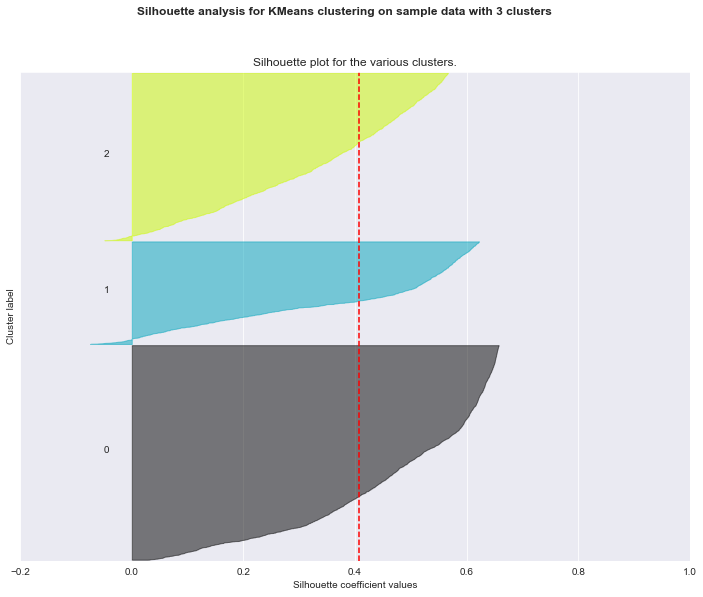

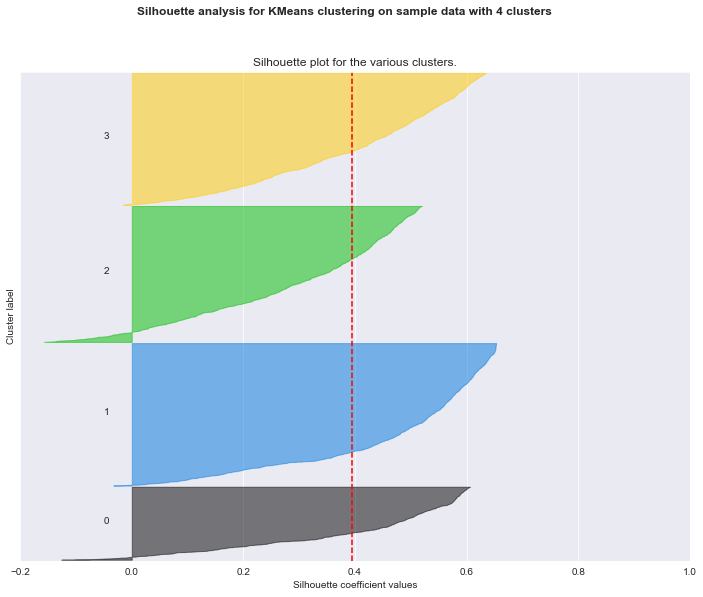

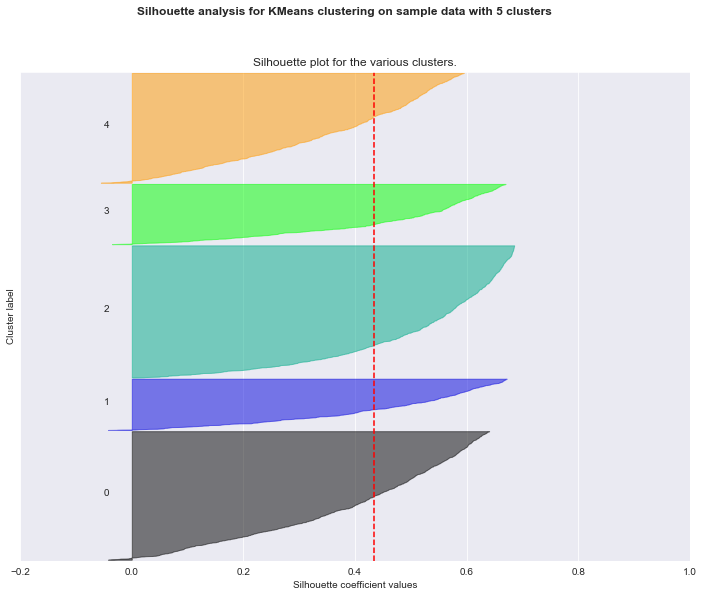

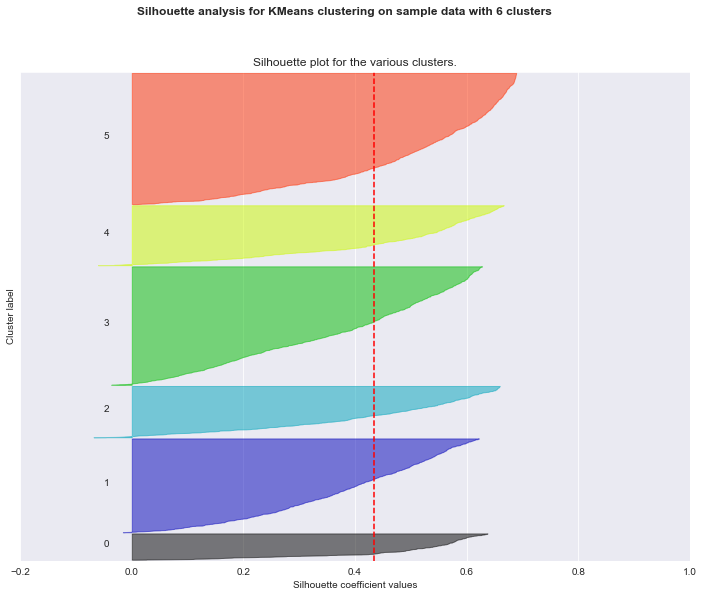

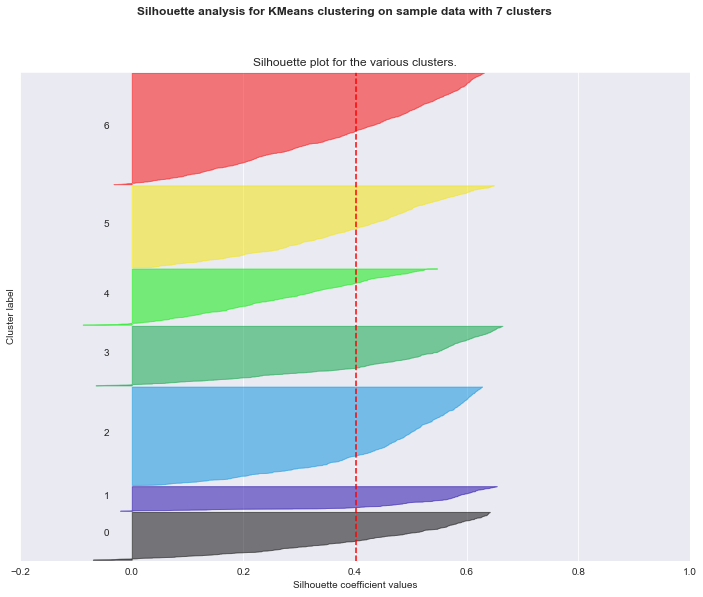

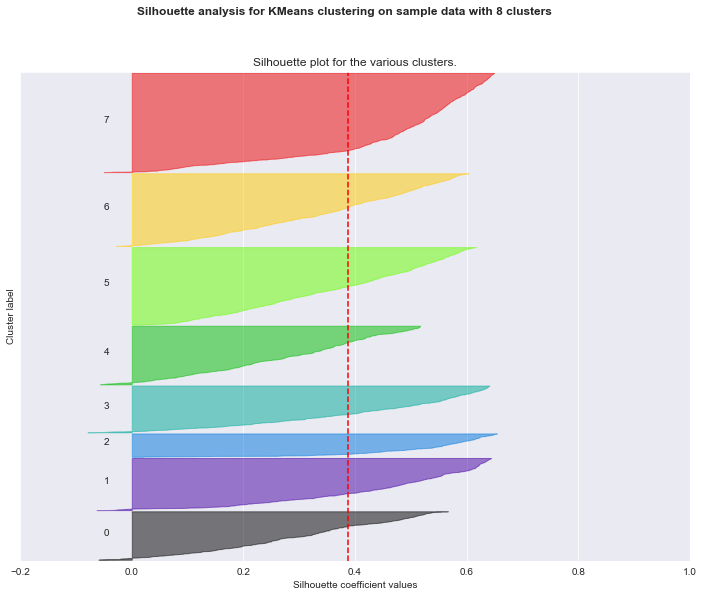

In [74]:
bestKMeansSilScore(X, cluster_range)

Based on the data above, I believe selecting a k=6 will provide us with the best clusters - since it has the highest avg. silhouette score and produces clusters of more comparable size as opposed to k=5, where each cluster appears to be a different sizes compared to the others.

We will now separate features from the labels and then build 3 distinct Scikit-learn pipelines: one for the numerical data, one for the categorical data, and one for the geographical data.  

For the numerical pipeline, we will need to impute missing values with the mean. For the categorical pipeline, we will create dummy variables for each of the two categorical columns, allowing us to feed them into a machine learning algorithm. Lastly, we'll perform K-means clustering and encoding in the geographical pipeline. 

We will also drop the column *id* since it is a non-interpretable surrogate (i.e. system-generated) key.

In [76]:
# Separating features from labels
train_labels = train_set.copy()['price']
train_features = train_set.copy().drop('price', axis=1)

In [78]:
# Storing categorical and numerical columns for future reference
CAT_COLS = ['property_type', 'room_type']
NUM_COLS = ['bedrooms', 'bathrooms', 'minimum_nights']
GEO_COLS = ['latitude', 'longitude']

In [79]:
# Sklearn transformers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

In [80]:
# Creating custo, transformer to use our KMeans Cluster
class ModelTransformer(TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        return self

    def transform(self, X, **transform_params):
        return pd.DataFrame(self.model.predict(X))

In [200]:
# Creating pipelines
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean'))])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='Other')), \
                                    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

geo_pipeline = Pipeline([('clusterer', ModelTransformer(KMeans(n_clusters=6))), \
                                    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Full pipeline object, with appropriate transformations for each column type united by a ColumnTransformer
full_pipeline = ColumnTransformer([('num', num_pipeline, NUM_COLS), ('cat', cat_pipeline, CAT_COLS), \
                                      ('geo', geo_pipeline, GEO_COLS)])

# Modeling

We'll aproach modeling in two stages: first, selecting 4 base models with default parameters, selecting whichever produces the lowest error during cross-validation. Following this, we will tune the hyperparameters of the winning base model. We'll make these computations easier by creating helper functions to measure error. For our case, we'll use the MAE, or Mean Absolute Error, as the loss function. The MAE is less sensitive to outiers than the RMSE (i.e. root mean squared error), which makes it more appropriate given that we have some price outliers in our data.

In [90]:
# Models
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Model evaluation functions
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error

In [201]:
# Transforming train set using pipeline we created
train_features_transformed = full_pipeline.fit_transform(train_features)

In [205]:
# List of models we will evaluate, as mentioned above
models = [Ridge(), RandomForestRegressor(), XGBRegressor(), LGBMRegressor()]

In [206]:
def cv_regressor_mae(model, X, y, cv):
	"""Computes mean and std. dev. of cross-validated MAE based on user-defined number of folds."""

	start = time.time()

	# Compute cross-validated accuracy scores
	neg_mae = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
	mae = -neg_mae

	# Print list of Acc. scores
	print(f"Mean MAE  computed using {cv}-fold cross-validation: {mae.mean()}")
	print(f"MAE std. deviation computed using {cv}-fold cross-validation: {mae.std()}")
	print(f"Computation time: {time.time() - start}")

In [207]:
# Computing MAE score for each base model using 10-fold cross-validation
for model in models:
	cv_regressor_mae(model, train_features_transformed, train_labels, 10)

Mean MAE  computed using 10-fold cross-validation: 31.77346054604684
MAE std. deviation computed using 10-fold cross-validation: 1.2364221648289244
Computation time: 0.1393132209777832
Mean MAE  computed using 10-fold cross-validation: 29.921791359880007
MAE std. deviation computed using 10-fold cross-validation: 0.8925791246919897
Computation time: 5.393177270889282
Mean MAE  computed using 10-fold cross-validation: 29.615872992801496
MAE std. deviation computed using 10-fold cross-validation: 1.0140679947281914
Computation time: 4.040884017944336
Mean MAE  computed using 10-fold cross-validation: 29.64125762046728
MAE std. deviation computed using 10-fold cross-validation: 0.9313926751133937
Computation time: 8.223084926605225


Let us now select LightGBM as our method of choice - it performed about the same as XGBoost and has an API that is easier to configure using Scikit-learn functions. We will perform hyperparameter tuning through grid search to find the best configuration across the hyperparameter space.

In [169]:
lgbm = LGBMRegressor(importance_type='gain')

# Creating parameter grid
param_grid = {'learning_rate': [0.05, 0.075, 0.085, 0.09, 0.1], 
                    'n_estimators': [100, 120, 140, 160, 180, 200], \
                        'num_leaves': [25, 30, 35]}

In [170]:
# Creating GridSearch object using 10-fold cross-validation
grid_search = GridSearchCV(lgbm, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [171]:
# Fitting grid to training data
grid_search.fit(train_features_transformed, train_labels)

GridSearchCV(cv=10, estimator=LGBMRegressor(importance_type='gain'), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.085, 0.09, 0.1],
                         'n_estimators': [100, 120, 140, 160, 180, 200],
                         'num_leaves': [25, 30, 35]},
             scoring='neg_mean_absolute_error')

In [172]:
print(grid_search.best_estimator_)

LGBMRegressor(importance_type='gain', learning_rate=0.09, n_estimators=140,
              num_leaves=30)


In [173]:
print(grid_search.best_score_)

-29.59550163935477


In [174]:
best_model = grid_search.best_estimator_

In [175]:
cv_regressor_mae(best_model, train_features_transformed, train_labels, 10)

Mean MAE  computed using 10-fold cross-validation: 29.59550163935477
MAE std. deviation computed using 10-fold cross-validation: 0.9583421205357261
Computation time: 0.28697991371154785


Therefore, our model's mean absolute error is 29.6, meaning our model's prediction of the nightly rental price of a listing is on average just under $30 off from the real price. As an additional check, let's also compute the MAPE.

In [141]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import mean_absolute_percentage_error

In [176]:
cv_results = cross_validate(best_model, train_features_transformed, train_labels, \
                        scoring='neg_mean_absolute_percentage_error', cv=10)

In [177]:
np.mean(cv_results['test_score'])

-0.25263480209787054

In [178]:
preds = np.repeat(np.mean(train_labels), train_labels.shape[0])

In [179]:
mean_absolute_error(train_labels, preds)

48.89266919699117

In [180]:
mean_absolute_percentage_error(train_labels, preds)

0.5053736748700921

In [144]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [181]:
importances = best_model.feature_importances_
feature_names = feature_names = [f"feature {i}" for i in range(train_features_transformed.shape[1])]

As we can see above, features 17, 0, 1, and 2 were the most important.

In [182]:
full_pipeline.transformers_[1][1]['encoder'].get_feature_names()

array(['x0_Aparthotel', 'x0_Apartment', 'x0_Bed and breakfast',
       'x0_Boutique hotel', 'x0_Condominium', 'x0_Guest suite',
       'x0_Guesthouse', 'x0_Hostel', 'x0_Hotel', 'x0_House', 'x0_Loft',
       'x0_Other', 'x0_Serviced apartment', 'x0_Townhouse',
       'x1_Entire home/apt', 'x1_Hotel room', 'x1_Private room',
       'x1_Shared room'], dtype=object)

In [183]:
full_pipeline.transformers_[2][1]['encoder'].get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5'], dtype=object)

In [184]:
cat_list = full_pipeline.transformers_[1][1]['encoder'].get_feature_names().tolist()

In [185]:
print(cat_list)

['x0_Aparthotel', 'x0_Apartment', 'x0_Bed and breakfast', 'x0_Boutique hotel', 'x0_Condominium', 'x0_Guest suite', 'x0_Guesthouse', 'x0_Hostel', 'x0_Hotel', 'x0_House', 'x0_Loft', 'x0_Other', 'x0_Serviced apartment', 'x0_Townhouse', 'x1_Entire home/apt', 'x1_Hotel room', 'x1_Private room', 'x1_Shared room']


In [186]:
geo_list = full_pipeline.transformers_[2][1]['encoder'].get_feature_names().tolist()

In [187]:
print(geo_list)

['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']


In [188]:
feats = NUM_COLS + cat_list + geo_list

In [189]:
print(feats)

['bedrooms', 'bathrooms', 'minimum_nights', 'x0_Aparthotel', 'x0_Apartment', 'x0_Bed and breakfast', 'x0_Boutique hotel', 'x0_Condominium', 'x0_Guest suite', 'x0_Guesthouse', 'x0_Hostel', 'x0_Hotel', 'x0_House', 'x0_Loft', 'x0_Other', 'x0_Serviced apartment', 'x0_Townhouse', 'x1_Entire home/apt', 'x1_Hotel room', 'x1_Private room', 'x1_Shared room', 'x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']


In [122]:
print(feats)

['bedrooms', 'bathrooms', 'minimum_nights', 'x0_Aparthotel', 'x0_Apartment', 'x0_Bed and breakfast', 'x0_Boutique hotel', 'x0_Condominium', 'x0_Guest suite', 'x0_Guesthouse', 'x0_Hostel', 'x0_Hotel', 'x0_House', 'x0_Loft', 'x0_Other', 'x0_Serviced apartment', 'x0_Townhouse', 'x1_Entire home/apt', 'x1_Hotel room', 'x1_Private room', 'x1_Shared room', 'x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']


In [190]:
len(feats)

27

In [191]:
feats[17]

'x1_Entire home/apt'

In [192]:
importances = best_model.feature_importances_
feature_names = feats

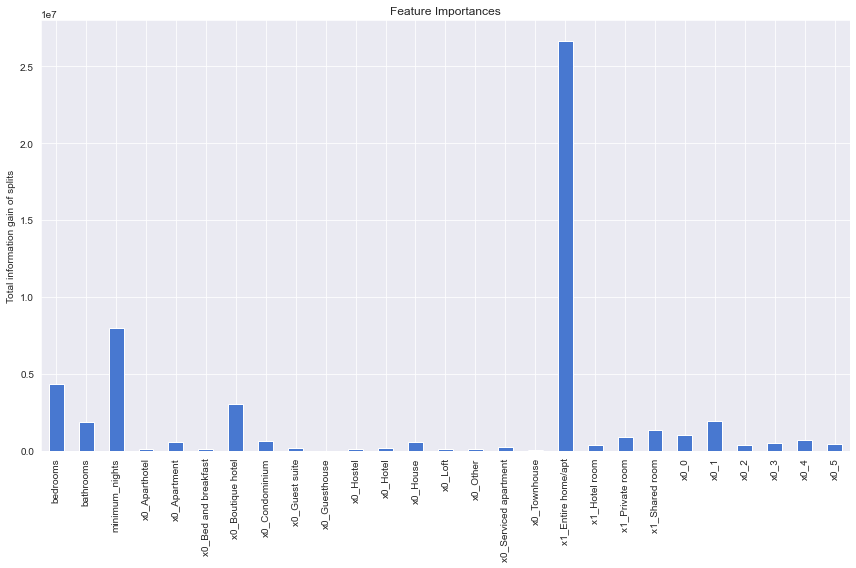

In [194]:
forest_importances = pd.Series(best_model.feature_importances_, index=feature_names)

fig, ax = plt.subplots(figsize=(12,8))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Total information gain of splits")
fig.tight_layout()

### Conclusion: The most important feature is the dummy variable *Entire home/apt* - this makes sense intuitively given that listings in this category are more expensive than all others, meaning that our model likely heavily relies on this feature to determine the final predicted price. Moreover, we see that *minimum_nights* and *bedrooms* are the next most "important" features. The former is somewhat surprising, given that there does not seem to be any intuitively relationship between price and minimum nights, while the latter is an expected correlation - i.e. the more bedrooms, the more expensive.